In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
    
df_base = pd.read_csv("MonthlyRainfall_mm_ByProvince.csv")

In [3]:
df_base.head()

,Year,Province,May,June,July,Aug.,Sep.,Oct.,Nov.
0,2016,Lai Chau,308.3,446.3,422.7,236.3,281.6,45.6,81.6
1,2016,Son La,347.3,166.0,154.5,286.1,129.4,32.0,42.3
2,2016,Tuyen Quang,285.7,74.1,312.0,306.9,86.7,104.4,40.5
3,2016,Ha Noi,249.0,95.1,280.4,534.5,178.5,45.0,9.3
4,2016,Bai Chay,205.9,211.5,567.5,497.4,213.8,43.6,18.1


In [4]:
df_base.shape

(165, 9)

In [5]:
def clean_data(datatable):
    cols = ['May', 'June', 'July','Aug.', 'Sep.', 'Oct.']
    
    ## Remove rows with missing values
    for column in cols:
        datatable[column].dropna(axis = 0, inplace = True)

    ## Convert columns to numeric values
    for column in cols:
        datatable[column] = pd.to_numeric(datatable[column])
        
    return datatable

df_clean = clean_data(df_base)
print(df_clean.shape)

(165, 9)


In [6]:
# Calculate summary statistics of a data frame

def describe(df, col):
    ## Compute the summary stats
    desc = df[col].describe()
    
    ## Change the name of the 50% index to median
    idx = desc.index.tolist()
    idx[5] = 'median'
    desc.index = idx
    return desc

describe(df_clean, 'July')

count     165.000000
mean      253.350909
std       176.834302
min         4.700000
25%       113.800000
median    219.500000
75%       357.300000
max       900.500000
Name: July, dtype: float64

In [7]:
describe(df_clean, 'Aug.')

count     165.000000
mean      261.407273
std       155.068530
min         1.400000
25%       146.700000
median    236.800000
75%       353.600000
max       866.200000
Name: Aug., dtype: float64

/Users/katherina_nguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/katherina_nguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


['May', 'Aug.']

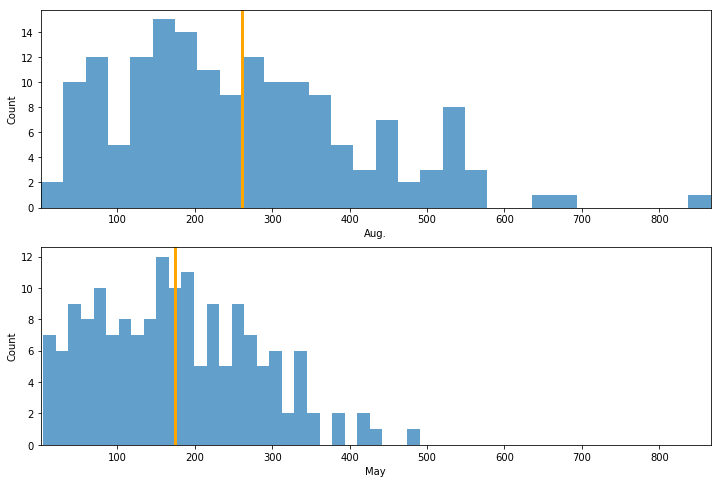

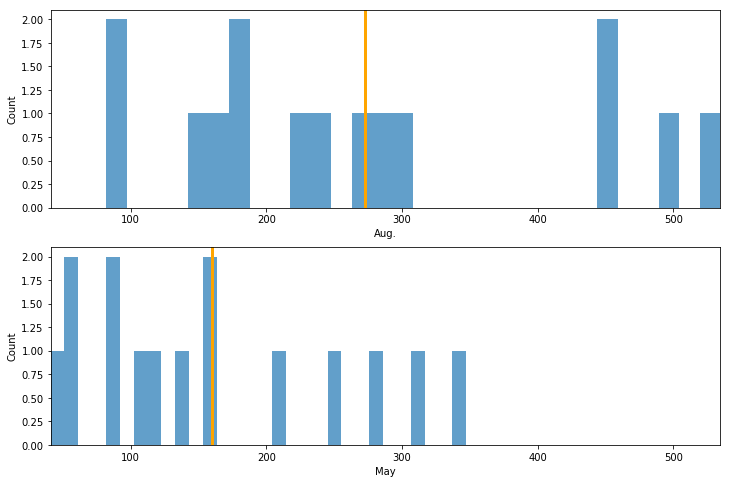

In [8]:
%matplotlib inline
def hist_rain(df, col1, col2, num_bins = 30):
    import matplotlib.pyplot as plt
    ## Setup for ploting two charts one over the other
    fig, ax = plt.subplots(2, 1, figsize = (12,8))
    
    mins = min([df[col1].min(), df[col2].min()])
    maxs = max([df[col1].max(), df[col2].max()])
    
    mean1 = df[col1].mean()
    mean2 = df[col2].mean()
    
    ## Plot the histogram   
    temp = df[col1].as_matrix()
    ax[1].hist(temp, bins = 30, alpha = 0.7)
    ax[1].set_xlim([mins, maxs])
    ax[1].axvline(x=mean1, color = 'orange', linewidth = 3)
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(col1)
    
    ## Plot the histogram   
    temp = df[col2].as_matrix()
    ax[0].hist(temp, bins = 30, alpha = 0.7)
    ax[0].set_xlim([mins, maxs])
    ax[0].axvline(x=mean2, color = 'orange', linewidth = 3)
    ax[0].set_ylabel('Count')
    ax[0].set_xlabel(col2)
    
    return [col1, col2]

years = df_clean[df_clean.Year == 2016]
hist_rain(df_clean, 'May', 'Aug.')
hist_rain(years, 'May', 'Aug.')

    Year     Province    May   June   July   Aug.   Sep.   Oct.   Nov.
0   2016     Lai Chau  308.3  446.3  422.7  236.3  281.6   45.6   81.6
1   2016       Son La  347.3  166.0  154.5  286.1  129.4   32.0   42.3
2   2016  Tuyen Quang  285.7   74.1  312.0  306.9   86.7  104.4   40.5
3   2016       Ha Noi  249.0   95.1  280.4  534.5  178.5   45.0    9.3
4   2016     Bai Chay  205.9  211.5  567.5  497.4  213.8   43.6   18.1
5   2016     Nam Dinh  116.7   92.0  296.7  446.2  220.9   78.3    7.8
6   2016         Vinh   85.5    9.7  114.5  177.3  741.4  563.9  287.5
7   2016          Hue  108.0  102.4   84.4  165.9  661.9  618.6  577.3
8   2016      Da Nang   59.0   47.0   54.3  145.0  783.3  411.2  336.8
9   2016     Qui Nhon   41.1   47.7    4.7  183.4  192.4  385.9  762.8
10  2016       Playku  161.8  195.1  141.6  448.7  524.0  229.1   54.0
11  2016       Da Lat  133.5  226.8  209.4   83.0  498.7  377.7  116.3
12  2016    Nha Trang   52.7   87.9   29.7   82.2  123.6  255.3  399.4
13  20

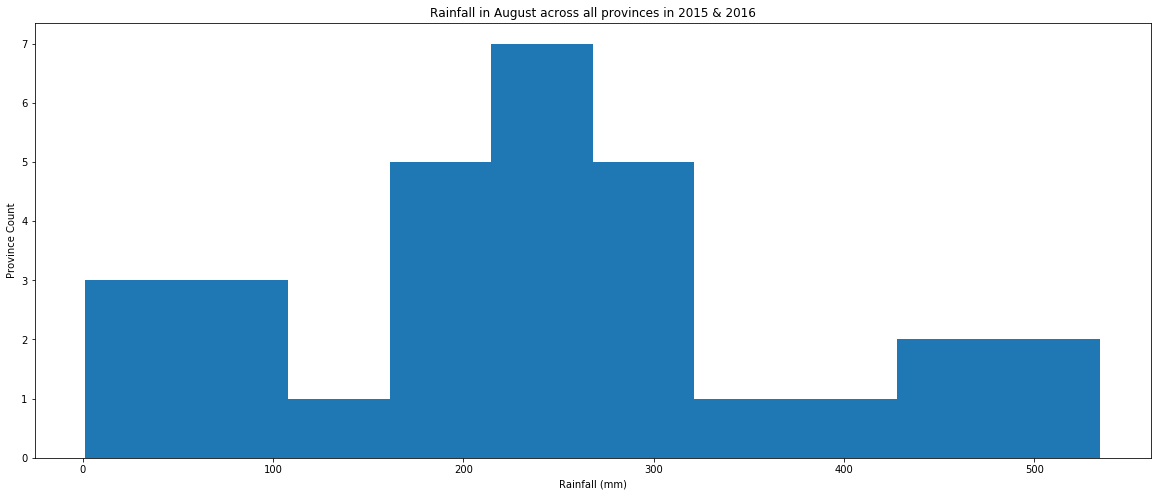

In [9]:
# histogram showing frequency of rainfall amounts over specified years for specified month

def bar_histogram(df, title):
    fig = plt.figure(figsize=(20,8)) # plot size
    ax = fig.gca() # define axis    
    df.plot.hist(ax = ax) # Use the plot.bar method on the counts data frame
    ax.set_title(title) # Give the plot a main title
    ax.set_xlabel('Rainfall (mm)') # Set text for the x axis
    ax.set_ylabel('Province Count')# Set text for y axis

years = df_clean[df_clean.Year >= 2015]
print(years)
bar_histogram(years['Aug.'], "Rainfall in August across all provinces in 2015 & 2016")

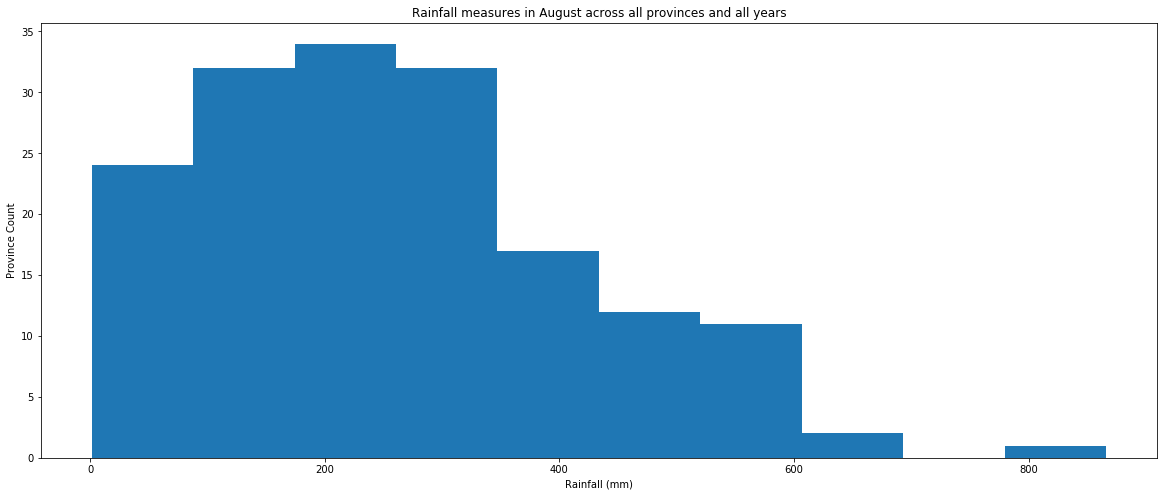

In [10]:
counts = df_clean['Aug.'] 
bar_histogram(counts, "Rainfall measures in August across all provinces and all years")

Text(0,0.5,'Number of Provinces')

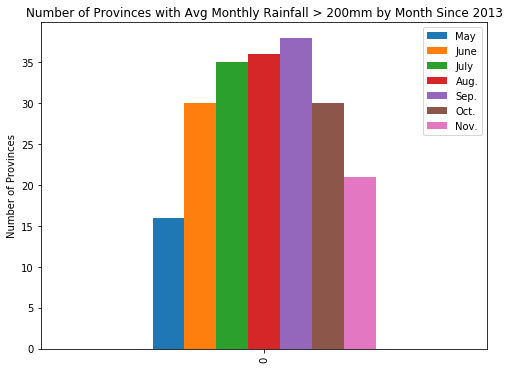

In [11]:
#count heavy rain days 

#if a date has rain > 200, count it a heavy rain day. 
months = ["May", "June", "July", "Aug.", "Sep.", "Oct.", "Nov."]
startyear = 2013;
years = df_clean[df_clean.Year >= startyear]
heavy_rain_days = [] #keeps count of number of heavy rain days per month
count = 0;

for x in months : 
    count = 0
    for i in years[x]: # for each month column in specified year
        if i >= 200: 
            count += 1
    heavy_rain_days.extend([count])

df_rainy = pd.DataFrame(np.array(heavy_rain_days).reshape(1,7), columns = list(months)) #transform new rainy day list into data frame

fig2 = plt.figure(figsize=(8,6)) # define plot area
ax = fig2.gca() # define axis    
df_rainy.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of Provinces with Avg Monthly Rainfall > 200mm by Month Since ' + str(startyear)) # Give the plot a main title
ax.set_ylabel('Number of Provinces')# Set text for y axis

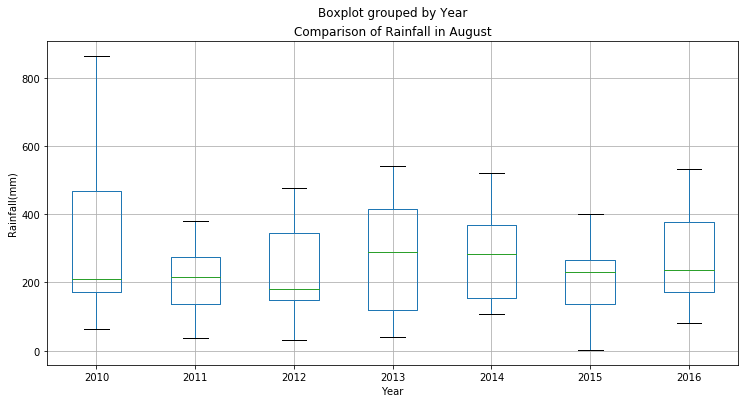

In [12]:
def box_plot(df, d1, d2, title):
    fig = plt.figure(figsize=(12,6)) # plot size
    ax = fig.gca() # define axis    
    df[[d2, d1]].boxplot(by = d1, ax = ax) # Use the plot.bar method on the new data frame
    ax.set_title(title) # Give the plot a title
    ax.set_xlabel(d1) # Set text for the x axis
    ax.set_ylabel("Rainfall(mm)")# Set text for y axis

years = df_clean[df_clean.Year >= 2010]
box_plot(years,'Year','Aug.', "Comparison of Rainfall in August") 

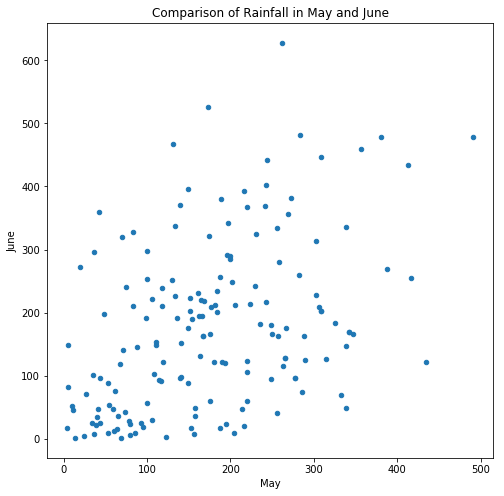

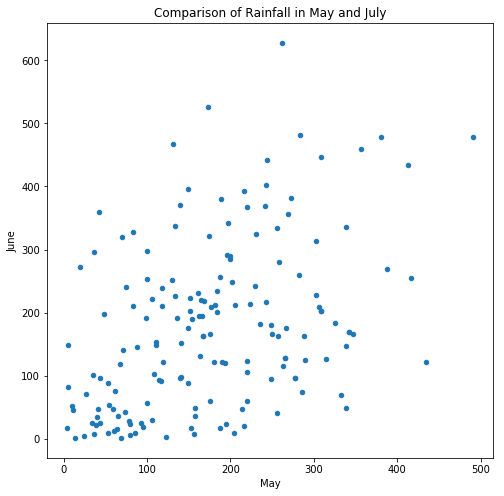

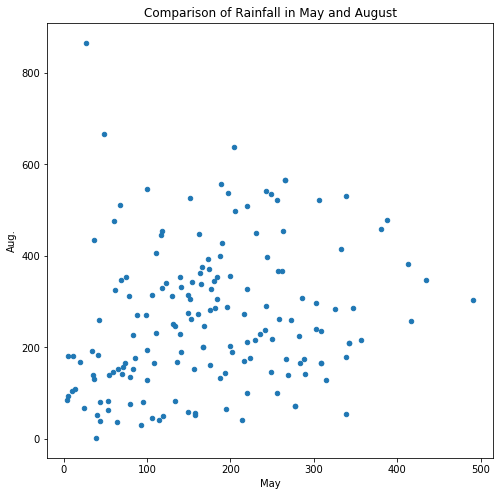

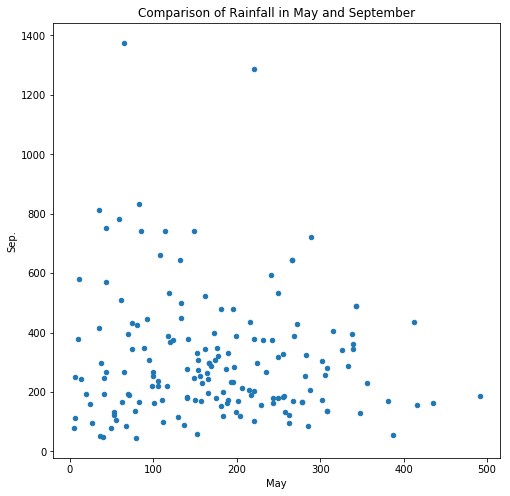

In [13]:
def scatter_plot(df, d1, d2, title):
    fig = plt.figure(figsize=(8,8)) # plot size
    ax = fig.gca() # define axis                   
    df.plot(kind = 'scatter', x = d1, y = d2, ax = ax)
    ax.set_title(title) # Give the plot a main title
    ax.set_xlabel(d1) # Set text for the x axis
    ax.set_ylabel(d2) # Set text for y axis

scatter_plot(df_clean,'May','June', "Comparison of Rainfall in May and June") 
scatter_plot(df_clean,'May','June', "Comparison of Rainfall in May and July") 
scatter_plot(df_clean,'May','Aug.', "Comparison of Rainfall in May and August") 
scatter_plot(df_clean,'May','Sep.', "Comparison of Rainfall in May and September") 


/Users/katherina_nguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


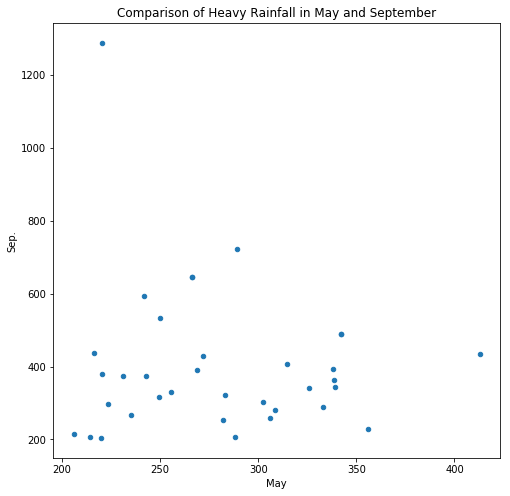

In [14]:
rainy = df_clean[df_clean.May >= 200][df_clean['Sep.'] >= 200]
scatter_plot(rainy,'May','Sep.', "Comparison of Heavy Rainfall in May and September")

In [15]:
# This is a statistical t-test function to test the null hypothesis that there is no significant difference between two data ranges


def difference_test(df, col1, col2, alpha):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    n, _, diff, var, _, _ = stats.describe(df[col1] - df[col2])
    degfree = n - 1

    temp1 = df[col1].as_matrix()
    temp2 = df[col2].as_matrix()
    res = ss.ttest_rel(temp1, temp2)
      
    means = ws.CompareMeans(ws.DescrStatsW(temp1), ws.DescrStatsW(temp2))
    confint = means.tconfint_diff(alpha=alpha, alternative='two-sided', usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
    
# This visualizes the key values in the t-test

def hist_difference(df, col1, col2, num_bins = 30, alpha =0.05):
    import matplotlib.pyplot as plt
    ## Setup for ploting two charts one over the other
    fig, ax = plt.subplots(2, 1, figsize = (12,8))
    
    mins = min([df[col1].min(), df[col2].min()])
    maxs = max([df[col1].max(), df[col2].max()])
    
    mean1 = df[col1].mean()
    mean2 = df[col2].mean()
    
    tStat = difference_test(df, col1, col2, alpha)
    pv1 = mean2 + tStat[4]    
    pv2 = mean2 + tStat[5]
    
    ## Plot the histogram   
    temp = df[col1].as_matrix()
    ax[1].hist(temp, bins = 30, alpha = 0.7)
    ax[1].set_xlim([mins, maxs])
    ax[1].axvline(x=mean1, color = 'red', linewidth = 4)    
    ax[1].axvline(x=pv1, color = 'red', linestyle='--', linewidth = 4)
    ax[1].axvline(x=pv2, color = 'red', linestyle='--', linewidth = 4)
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(col1)
    
    ## Plot the histogram   
    temp = df[col2].as_matrix()
    ax[0].hist(temp, bins = 30, alpha = 0.7)
    ax[0].set_xlim([mins, maxs])
    ax[0].axvline(x=mean2, color = 'red', linewidth = 4)
    ax[0].set_ylabel('Count')
    ax[0].set_xlabel(col2)
    
    return tStat


/Users/katherina_nguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/Users/katherina_nguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/katherina_nguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/katherina_nguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


DegFreedom     24.459514
Difference   -112.840000
Statistic      -3.260934
PValue          0.005688
Low95CI      -206.948290
High95CI      -18.731710
dtype: float64

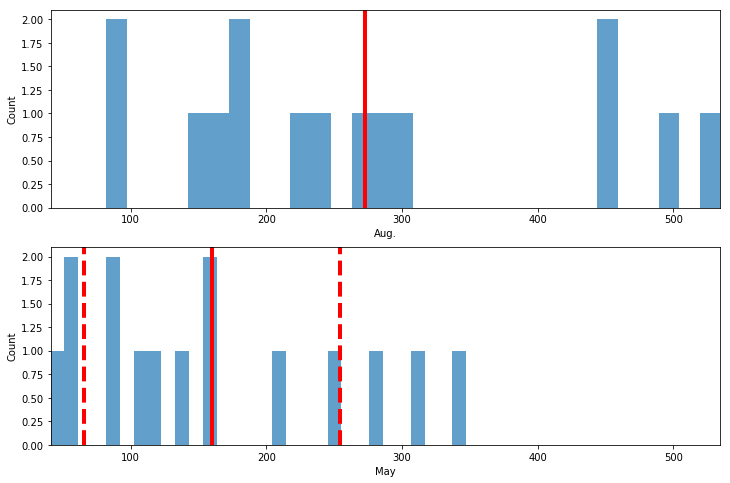

In [16]:
# test for null hypothesis that there is no significant difference between May and August data in 2016

years = df_clean[df_clean.Year == 2016]
hist_difference(years, 'May', 'Aug.')

/Users/katherina_nguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/Users/katherina_nguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/katherina_nguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/katherina_nguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


DegFreedom     20.197853
Difference     46.260000
Statistic       0.992275
PValue          0.337905
Low95CI       -94.068542
High95CI      186.588542
dtype: float64

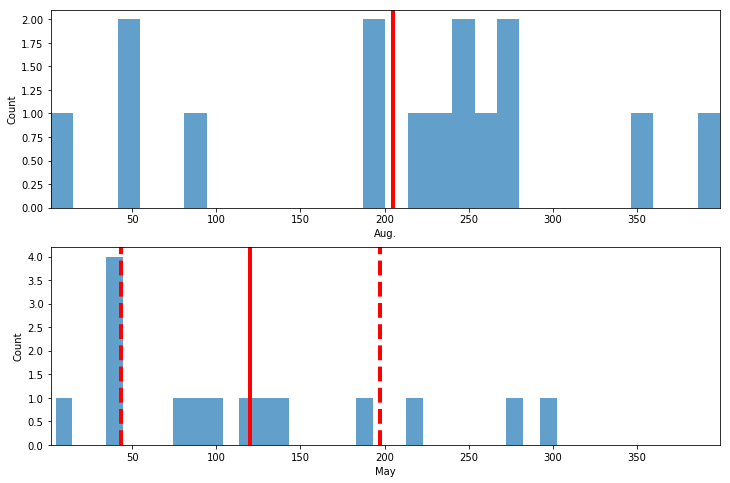

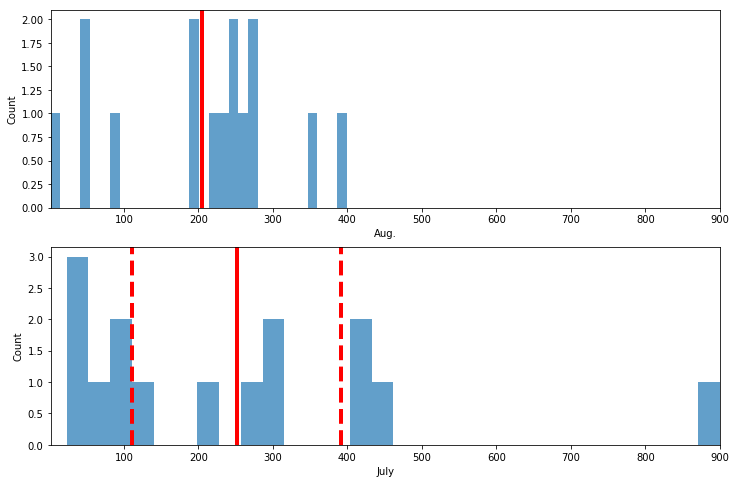

In [17]:
# test for null hypothesis that there is no significant difference between rainfall during different month ranges in 2016

years = df_clean[df_clean.Year == 2015]
hist_difference(years, 'May', 'Aug.')
hist_difference(years, 'July', 'Aug.')